In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('Customerchurn.csv')
data=df.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [23]:
# churn = no (musteri helede bizde qalib yes olanda terk edib)
data.loc[data.Churn =='No' ,'Churn']=0
data.loc[data.Churn == 'Yes', 'Churn']=1

In [24]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<AxesSubplot:ylabel='Churn'>

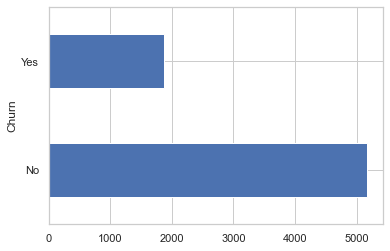

In [29]:
df.Churn.value_counts().plot.barh()

In [30]:
columns_list=data.select_dtypes(include='object').columns.tolist()

In [31]:
for i in columns_list:
    data[i]=pd.factorize(data[i])[0]
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,0,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,2,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,4,1


In [32]:
data.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Categories')

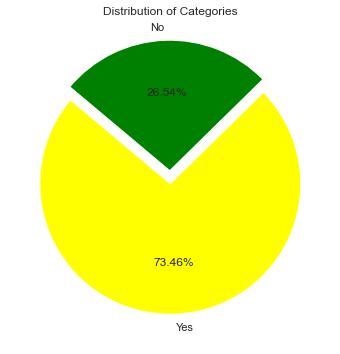

In [33]:
sizes=[5174,1869]
labels=('Yes', 'No')
custom_colors = ['yellow','green']
# Create a pie chart using seaborn with custom colors
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=custom_colors, explode=(0, 0.1))
plt.title("Distribution of Categories")

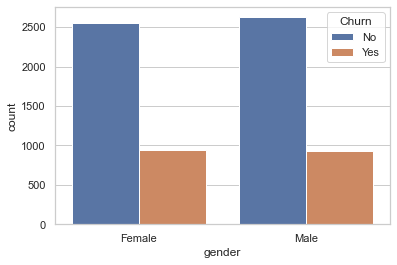

In [42]:
sns.countplot(x="gender" , hue="Churn" , data=df);

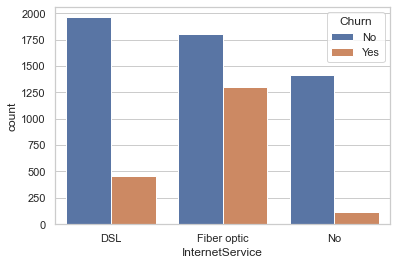

In [47]:
sns.countplot(x='InternetService' , hue='Churn' , data=df);

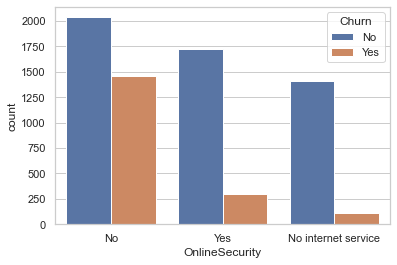

In [51]:
sns.countplot(x='OnlineSecurity' , hue='Churn' , data=df);

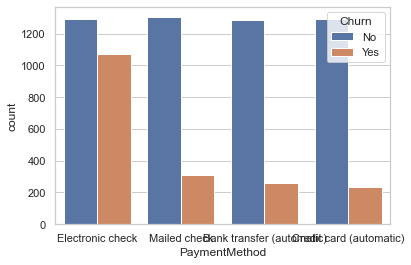

In [53]:
sns.countplot(x='PaymentMethod' , hue='Churn' , data=df);

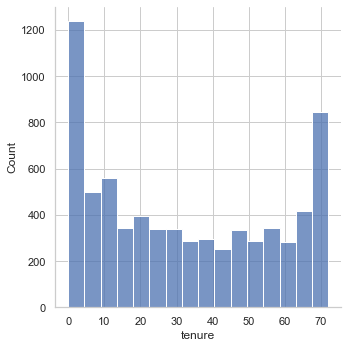

In [67]:
sns.displot(df.tenure);

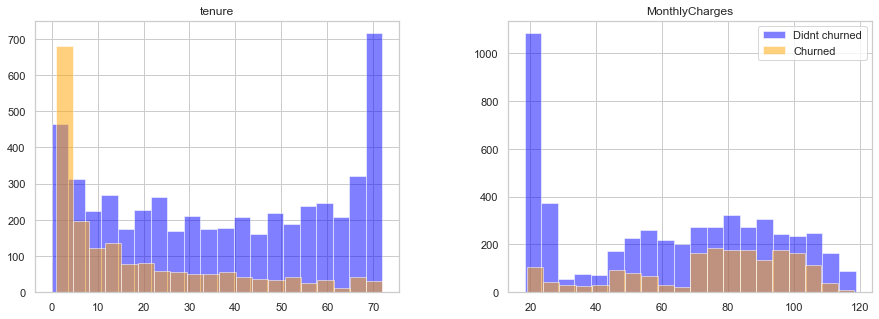

In [73]:
from matplotlib.pyplot import subplot
numerical_feature=['tenure' , 'MonthlyCharges']
fig,ax = plt.subplots(1,2,figsize=(15,5))
df[df.Churn=='No'][numerical_feature].hist(bins=20 , color='blue' , alpha=0.5 ,ax=ax ,label='Didnt churned')
df[df.Churn=='Yes'][numerical_feature].hist(bins=20 , color='orange' , alpha=0.5 ,ax=ax,label='Churned')
plt.legend(loc='upper right')
plt.show()

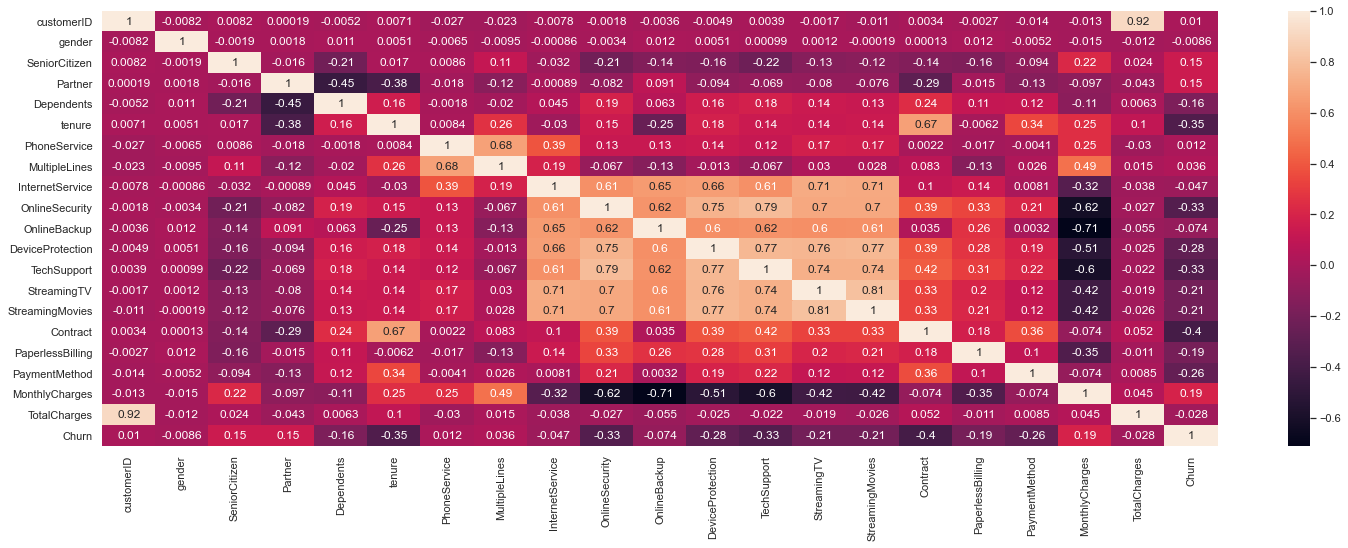

In [83]:
plt.figure(figsize=(25,8))
sns.heatmap(data.corr() ,annot=True);

In [87]:
x=data.drop(columns=['Churn'] , axis=1)
y=data['Churn']

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=42)

In [95]:
from sklearn.svm import SVC
model=SVC(kernel='linear' , degree=8).fit(x_train,y_train)

In [98]:
prediction=model.predict(x_test)
prediction

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409

